In [6]:
# Important necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

from matplotlib import rc
rc('text', usetex=True)
rc('xtick.major', size=5, pad=7)
rc('xtick', labelsize=25)
rc('ytick.major', size=5, pad=7)
rc('ytick', labelsize=25)

%matplotlib inline  

# Reading the Data

In [2]:
def readfile(name, folder='ntuples_2_6/', lumi=100*1000):
    data = pd.read_csv(folder+name+'.evt', header=0, delimiter=',', skipinitialspace=True)
    data.meta = pd.read_csv(folder+name+'.meta', header=0, delimiter=',', skipinitialspace=True)
    if 'weight' in data.columns:
        data['weight'] *= (data.meta['cxn']*lumi/data.meta['sum_weight'])[0]
    else:
        data['weight'] = (data.meta['cxn']*lumi / data.meta['nevt'])[0]  
    return data

bkg = ['bkg_ttbar_semilep', 'bkg_ttbar_dilep', 'bkg_Wj', 'bkg_Zj']
bkg = [ readfile(f) for f in bkg ]


    
rinv = [.01, .1, .2, .3, .4, .5, .6, .7, .8, .9, .98, .99, 1.0 ]

def to_str(num):
    if num <= .9:
        return '{:.1g}'.format(num)
    elif num!= 1:
        return '{:.2g}'.format(num)
    else:
        return '1.0'

rinv_str = [  to_str(r)  for r in rinv ]
rinv_str = [ 'monojet_10_rinv' + st for st in rinv_str ]


sig10 = [ readfile(f, 'ntuples_2_12/') for f in rinv_str ]

rinv_str = [  to_str(r)  for r in rinv ]
rinv_str = [ 'monojet_50_rinv' + st for st in rinv_str ]

sig50 = [ readfile(f, 'ntuples_2_12/') for f in rinv_str ]

rinv_str = [  to_str(r)  for r in rinv ]
rinv_str = [ 'monojet_20_rinv' + st for st in rinv_str ]


sig20 = [ readfile(f, 'ntuples_2_12/') for f in rinv_str ]

rinv_str = [  to_str(r)  for r in rinv ]
rinv_str = [ 'monojet_100_rinv' + st for st in rinv_str ]

sig100 = [ readfile(f, 'ntuples_2_12/') for f in rinv_str ]

# rinv_str = [  to_str(r)  for r in rinv ]
# rinv_str = [ 'monojet_200_rinv' + st for st in rinv_str ]

# sig200 = [ readfile(f, 'ntuples_2_12/') for f in rinv_str ]

rinv_str = [  to_str(r)  for r in rinv ]
rinv_str = [ 'monojet_500_rinv' + st for st in rinv_str ]

sig500 = [ readfile(f, 'ntuples_2_12/') for f in rinv_str ]

rinv_str = [  to_str(r)  for r in rinv ]
rinv_str = [ 'monojet_1000_rinv' + st for st in rinv_str ]

sig1000 = [ readfile(f, 'ntuples_2_12/') for f in rinv_str ]

np.sum(bkg[-1]['weight'])

2309351.597287198

### Let's make some quick plots

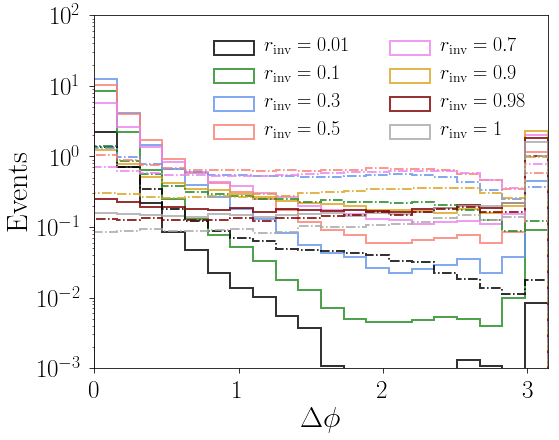

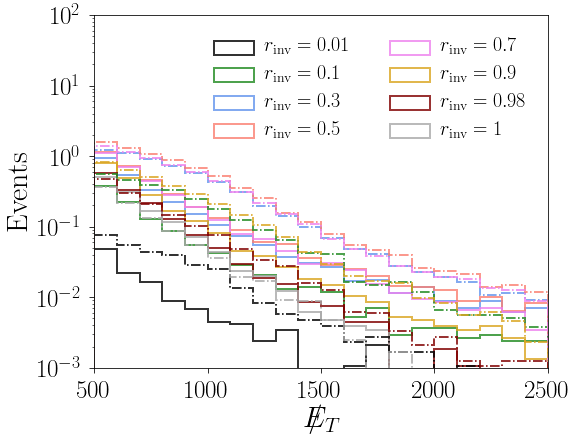

In [3]:
# make histograms
def newfig(name):
    fig=plt.figure(name,figsize=(9,7))
    plt.subplots_adjust(left=0.2, right=0.90, top=0.9, bottom=0.2)


plot_color=['black','forestgreen','cornflowerblue', 'salmon','violet','goldenrod','maroon','darkgrey','lightpink','black','forestgreen','cornflowerblue', 'salmon','violet','goldenrod','maroon','darkgrey','lightpink']

plot_ls=['solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid','solid']

def plot_dphi(l, sig, lw=3, ls='solid'):
    newfig("dphi")
    coli=0
    for i,fb in enumerate(sig):
        
        if rinv[i] in l:
            
            f=fb.query('pt1 > 250 & MEt > 100')
            mylabel=("$r_{\\rm inv}=%0.1g$" % rinv[i])
            if rinv[i] > 0.9:
                mylabel="$r_{\\rm inv}=%0.2g$" % rinv[i]

            plt.hist(f['dphi'], weights=f['weight'], 
                     bins=np.linspace(0,np.pi,20 + 1),
                     histtype='step', color=plot_color[coli], alpha=.8, lw=lw, linestyle=ls,
                     label=mylabel)
            coli+=1
            plt.xlim([0,np.pi])
            plt.yscale('log', nonposy='clip')
            plt.xlabel(r'$\Delta \phi$',fontsize=30)
            plt.ylabel(r'${\rm Events}$',fontsize=30)



def plot_met(l,sig, lw=3, ls='solid'):
    newfig("met")
    coli=0
    for i,fb in enumerate(sig):
        if rinv[i] in l:
            f=fb.query('pt1 > 250 & MEt > 100')
            mylabel=("$r_{\\rm inv}=%0.1g$" % rinv[i])
            if rinv[i] > 0.9:
                mylabel="$r_{\\rm inv}=%0.2g$" % rinv[i]

            plt.hist(f['MEt'], weights=f['weight'], 
                     bins=np.linspace(500,2500,20 + 1),
                     histtype='step', color=plot_color[coli], alpha=.8, lw=lw, linestyle=ls,
                     label=mylabel)
            coli+=1
            plt.xlim([500,2500])
            plt.yscale('log', nonposy='clip')
            plt.xlabel(r'$\slash \!\!\!\! E_{T}$',fontsize=30)
            plt.ylabel(r'${\rm Events}$',fontsize=30)


            
plot_dphi(l=[.01, .1, .3, .5, .7, .9, .98, 1.0], sig=sig10, lw=2)
plt.ylim([1e-3, 100])
plt.legend(bbox_to_anchor=(0, 0, 0.97, 0.95),
           fontsize=20, ncol=2,frameon=False,
           handletextpad=.5,
           borderaxespad=0.)
# plot_dphi(l=[.01, .1, .3, .5, .7, .9, .98, 1.0], sig=sig50, lw=2, ls = 'dashed')

plot_dphi(l=[.01, .1, .3, .5, .7, .9, .98, 1.0], sig=sig500, lw=2, ls = '-.')

plt.ylim([1e-3, 100])
# plt.legend(bbox_to_anchor=(0, 0, 0.97, 0.95),
#            fontsize=20, ncol=2,frameon=False,
#            handletextpad=.5,
#            borderaxespad=0.)

plt.savefig('dphi_sig.pdf')
plt.show()


plot_met(l=[.01, .1, .3, .5, .7, .9, .98, 1.0], sig=sig10, lw=2, ls = 'solid')
plt.legend(bbox_to_anchor=(0, 0, 0.97, 0.95),
           fontsize=20, ncol=2,frameon=False,
           handletextpad=.5,
           borderaxespad=0.)

# plot_met(l=[.01, .1, .3, .5, .7, .9, .98, 1.0], sig=sig50, lw=2, ls = 'dashed')
plot_met(l=[.01, .1, .3, .5, .7, .9, .98, 1.0], sig=sig500, lw=2, ls = '-.')



plt.ylim([1e-3, 100])


#plt.xscale('log', nonposy='clip')
#ticks=10.0**(np.arange(-3,3,1))

plt.savefig('met_sig.pdf')
plt.show()


In [4]:
def plot_dphi(l):
    newfig("dphi_bkg")
    for i,fb in enumerate(bkg):
        f=fb.query('pt1 > 250 & MEt > 100')
        mylabel=("$r_{\\rm inv}=%0.1g$" % rinv[i])
        if rinv[i] > 0.9:
            mylabel="$r_{\\rm inv}=%0.2g$" % rinv[i]

        plt.hist(f['dphi'], weights=f['weight'], 
                 bins=np.linspace(0,np.pi,20 + 1),
                 histtype='step', color=plot_color[i], alpha=.8, lw=3, linestyle=plot_ls[i],
                 label=mylabel)
        plt.xlim([0,np.pi])
        plt.yscale('log', nonposy='clip')
        plt.xlabel(r'$\Delta \phi$',fontsize=30)
        plt.ylabel(r'${\rm Events}$',fontsize=30)



In [5]:
def get_exclusion(sig, extra_cut='dphi > 0.4 ', sys_factor=1.0):
    metcut = [ 700, 800, 900, 1000, 1100, 1200 ]
    sys = [0.04, 0.0475, 0.055, 0.0625, 0.07, 0.095]
    sys = [ s*sys_factor for s in sys ]

    cut = [ 'MEt > ' + str(mc) + ' & pt1 > 300' + '& ' + extra_cut for mc in metcut]
    nevt_cut = np.asarray([ [ np.sum(d.query(c)['weight']) for d in sig ] for c in cut ])

    exclusion_bkg = np.asarray([ [np.sum(d.query(c)['weight']) for d in bkg ] for c in cut])

    sum_bkg = np.sum(exclusion_bkg, axis=1)
    exclusion=2*np.sqrt(sum_bkg + (sum_bkg*sys)**2)
    exclusion_factor = np.asarray([ exclusion[i]/c for i,c in enumerate(nevt_cut) ])

    return np.amin(exclusion_factor, axis=0)

exc_small= get_exclusion(sig10, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig10, extra_cut='dphi > 0.4 ')


print(np.asarray([np.sum(d.query('dphi>0.4 & 600 > MEt > 500 & pt1 > 250')['weight']) for d in bkg]))
print(exc_small)
print(exc_large)

[   299.68917593      0.           6465.15191722  11629.2497616 ]
[ 3173.44129759   394.80699593   203.99246883   149.20902171   129.37374262
   131.60233439   144.55098877   175.62104567   281.38190024   697.67237998
  4471.68027502  5621.53908165  7287.17718418]
[ 211856.35032463   26482.16001933    4555.99648444    2847.49182171
    1665.41031193     942.61966047     731.45815146     508.10353279
     390.51401678     371.4124945      596.71463263     600.36035085
     703.52459807]


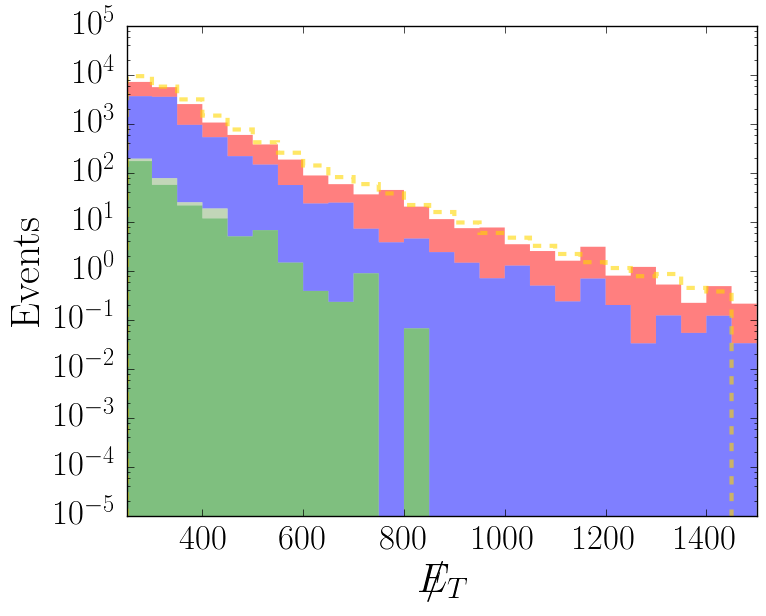

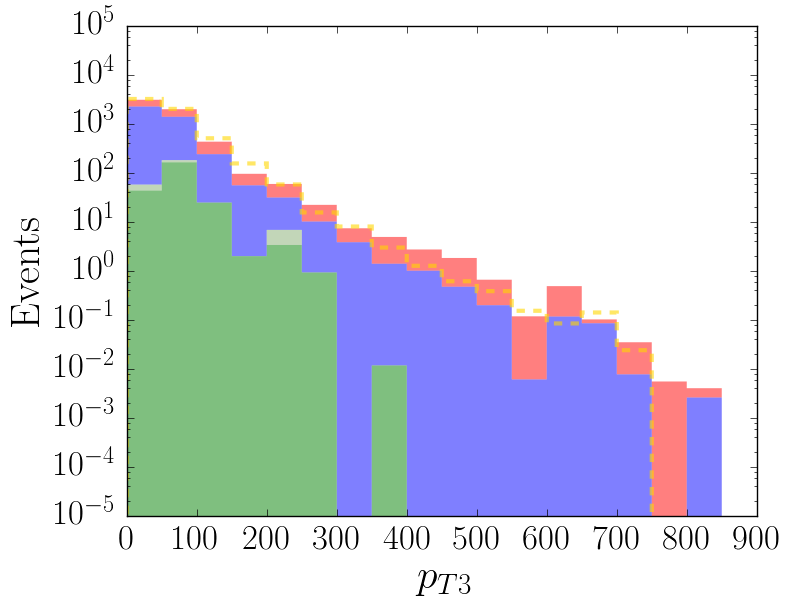

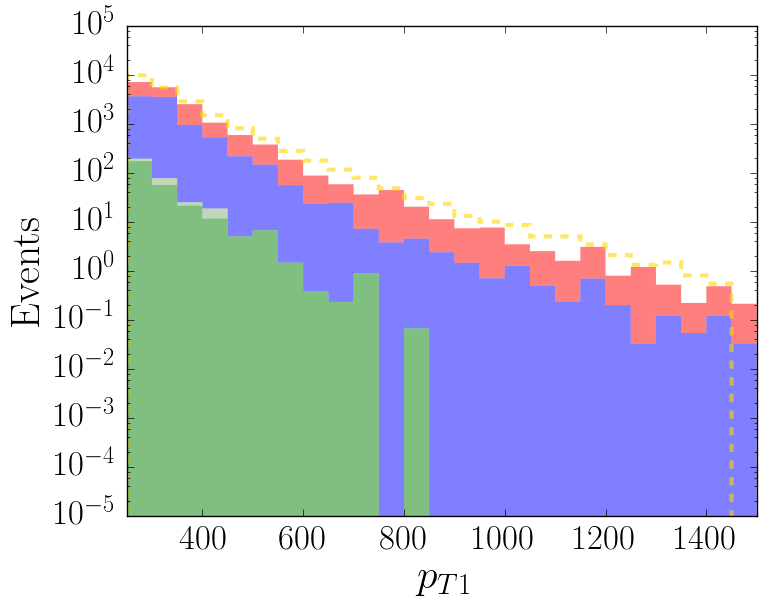

In [54]:
pt3_valid = pd.read_csv('ntuples/pt3_validation.csv', header=0, delimiter=',', skipinitialspace=True)
pt1_valid = pd.read_csv('ntuples/pt1_validation.csv', header=0, delimiter=',', skipinitialspace=True)
met_valid = pd.read_csv('ntuples/MET_validation.csv', header=0, delimiter=',', skipinitialspace=True)


bkg_cut = [ b.query('pt1>250 & MEt>250 & eta1<2.4 & nj<=4 & dphi >.4') for b in bkg ]
color_list= ['green','sage', 'blue','red']


newfig('met')
hist_list= [ b['MEt'] for b in bkg_cut ]
w_list= [ b['weight'] for b in bkg_cut ]
plt.hist(hist_list, weights=w_list,
         bins=np.linspace(0,1500,1500/50 + 1),
         histtype='stepfilled', stacked=True, color=color_list, alpha=.5, lw=0,
         label=[r'$t\bar{t}\rightarrow 2l+j$',r'$t\bar{t}\rightarrow l+j$',r'$W+j$',r'$W+j$',r'$Z+j$'])

plt.hist(met_valid['MEt'],weights=met_valid['nevt'],bins=np.linspace(0,1500,1500/50 + 1),histtype='step', lw=3, alpha=.6, color='gold', ls='--')

plt.xlim([250,1500])
plt.ylim([1e-5,1e5])
plt.yscale('log', nonposy='clip')
plt.xlabel(r'$\slash \!\!\!\! E_{T}$',fontsize=30)
plt.ylabel(r'${\rm Events}$',fontsize=30)
plt.savefig('met.pdf')

newfig('pt3')
hist_list= [ b['pt3'] for b in bkg_cut ]
w_list= [ b['weight'] for b in bkg_cut ]
plt.hist(hist_list, weights=w_list,
         bins=np.linspace(0,2000,2000/50 + 1),
         histtype='stepfilled', stacked=True, color=color_list, alpha=.5, lw=0,
         label=[r'$W+j$',r'$Z+j$'])

plt.hist(pt3_valid['pt3'],weights=pt3_valid['nevt'],bins=np.linspace(0,2000,2000/50 + 1),histtype='step', lw=3, alpha=.6, color='gold', ls='--')

plt.xlim([0,900])
plt.ylim([1e-5,1e5])
plt.yscale('log', nonposy='clip')
plt.xlabel(r'$p_{T3}$',fontsize=30)
plt.ylabel(r'${\rm Events}$',fontsize=30)
plt.savefig('pt3.pdf')


newfig('pt1')
hist_list= [ b['MEt'] for b in bkg_cut ]
w_list= [ b['weight'] for b in bkg_cut ]
plt.hist(hist_list, weights=w_list,
         bins=np.linspace(0,1500,1500/50 + 1),
         histtype='stepfilled', stacked=True, color=color_list, alpha=.5, lw=0,
         label=[r'$W+j$',r'$Z+j$'])

plt.hist(pt1_valid['pt1'],weights=pt1_valid['nevt'],bins=np.linspace(0,1500,1500/50 + 1),histtype='step', lw=3, alpha=.6, color='gold', ls='--')


plt.xlim([250,1500])
plt.ylim([1e-5,1e5])
plt.yscale('log', nonposy='clip')
plt.xlabel(r'$p_{T1}$',fontsize=30)
plt.ylabel(r'${\rm Events}$',fontsize=30)
plt.savefig('pt1.pdf')


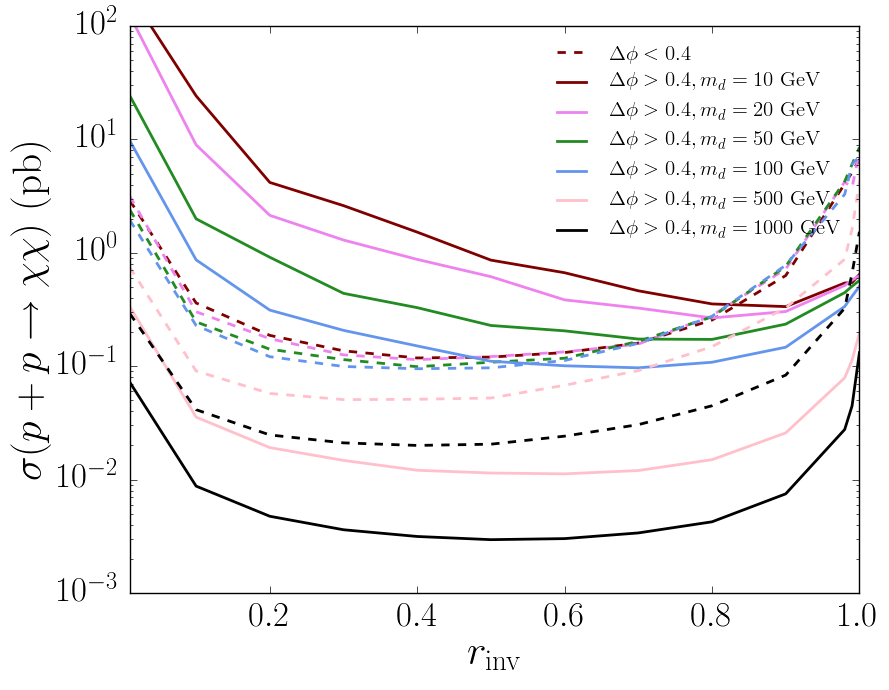

In [6]:
newfig("exc")
#plt.plot(rinv, np.sqrt(exc/(5./2.)**4), lw=3, alpha=0.3)

exc_small= get_exclusion(sig10, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig10, extra_cut='dphi > 0.4 ')

# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig10 ])

plt.plot(rinv, exc_small*cxn, lw=2, ls='--',
                 color='maroon',  label=r'$\Delta \phi < 0.4$')
plt.plot(rinv, exc_large*cxn, lw=2,
                 color='maroon', label=r'$\Delta \phi > 0.4, m_d = 10 ~\mathrm{GeV}$')

exc_small= get_exclusion(sig20, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig20, extra_cut='dphi > 0.4 ')

# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig20 ])

plt.plot(rinv, exc_small*cxn, lw=2,  ls='--',
                 color='violet')
plt.plot(rinv, exc_large*cxn, lw=2,
                 color='violet',label=r'$\Delta \phi > 0.4, m_d = 20 ~\mathrm{GeV}$')

exc_small= get_exclusion(sig50, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig50, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig50 ])

plt.plot(rinv, exc_small*cxn, lw=2,  ls='--',
                 color='forestgreen')
plt.plot(rinv, exc_large*cxn, lw=2,
                 color='forestgreen',label=r'$\Delta \phi > 0.4, m_d = 50 ~\mathrm{GeV}$')


exc_small= get_exclusion(sig100, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig100, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig100 ])

plt.plot(rinv, exc_small*cxn, lw=2, ls='--',
                 color='cornflowerblue')
plt.plot(rinv, exc_large*cxn, lw=2,
                 color='cornflowerblue', label=r'$\Delta \phi > 0.4, m_d = 100 ~\mathrm{GeV}$')

exc_small= get_exclusion(sig500, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig500, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig500 ])

plt.plot(rinv, exc_small*cxn, lw=2, ls='--',
                 color='pink')
plt.plot(rinv, exc_large*cxn, lw=2,
                 color='pink', label=r'$\Delta \phi > 0.4, m_d = 500 ~\mathrm{GeV}$')


exc_small= get_exclusion(sig1000, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig1000, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig1000 ])

plt.plot(rinv, exc_small*cxn, lw=2, ls='--',
                 color='black')
plt.plot(rinv, exc_large*cxn, lw=2,
                 color='black', label=r'$\Delta \phi > 0.4, m_d = 1000 ~\mathrm{GeV}$')






plt.yscale('log', nonposy='clip')
plt.xlabel(r'$r_{\rm inv}$',fontsize=30)
plt.ylabel(r'$\sigma(p + p \rightarrow \chi \chi) \;({\rm pb})$',fontsize=30)
plt.xlim([0.01,1.0])
plt.ylim([1e-3, 1e2])

plt.legend(loc='upper right',
           fontsize=15, ncol=1,frameon=False)
plt.tight_layout()
plt.savefig("cxn.pdf")




plt.show()


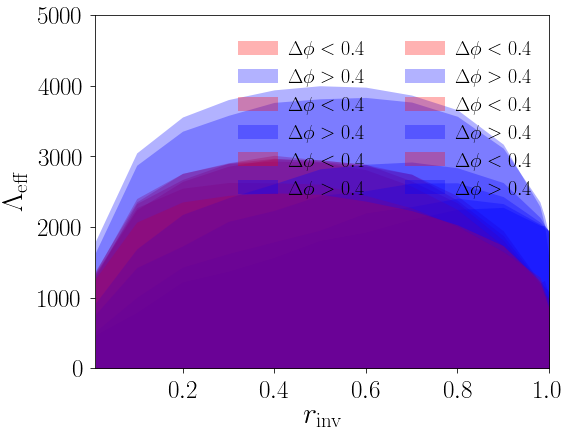

In [6]:
newfig("exc")
#plt.plot(rinv, np.sqrt(exc/(5./2.)**4), lw=3, alpha=0.3)

gr_arr = []
le_arr = []

exc_small= get_exclusion(sig10, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig10, extra_cut='dphi > 0.4 ')

# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig10 ])

cutoff=10000

plt.fill_between(rinv, 0, cutoff/(exc_small**(1/4)), lw=0, 
                 color='red', facecolor='red',alpha=0.3, label=r'$\Delta \phi < 0.4$')
plt.fill_between(rinv, 0, cutoff/(exc_large**(1/4)), lw=0,
                 color='blue', facecolor='blue',alpha=0.3, label=r'$\Delta \phi > 0.4$')

gr_arr.append(cutoff/(exc_large**(1/4)))
le_arr.append(cutoff/(exc_small**(1/4)))
              
exc_small= get_exclusion(sig20, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig20, extra_cut='dphi > 0.4 ')

# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig20 ])

plt.fill_between(rinv, 0, cutoff/(exc_small**(1/4)), lw=0, 
                 color='red', facecolor='red',alpha=0.3, label=r'$\Delta \phi < 0.4$')
plt.fill_between(rinv, 0, cutoff/(exc_large**(1/4)), lw=0,
                 color='blue', facecolor='blue',alpha=0.3, label=r'$\Delta \phi > 0.4$')

gr_arr.append(cutoff/(exc_large**(1/4))) 
le_arr.append(cutoff/(exc_small**(1/4)))
              
exc_small= get_exclusion(sig50, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig50, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig50 ])

plt.fill_between(rinv, 0, cutoff/(exc_small**(1/4)), lw=0, 
                 color='red', facecolor='red',alpha=0.3, label=r'$\Delta \phi < 0.4$')
plt.fill_between(rinv, 0, cutoff/(exc_large**(1/4)), lw=0,
                 color='blue', facecolor='blue',alpha=0.3, label=r'$\Delta \phi > 0.4$')


gr_arr.append(cutoff/(exc_large**(1/4)))
le_arr.append(cutoff/(exc_small**(1/4)))
              
exc_small= get_exclusion(sig100, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig100, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig100 ])

plt.fill_between(rinv, 0, cutoff/(exc_small**(1/4)), lw=0, 
                 color='red', facecolor='red',alpha=0.3, label=r'$\Delta \phi < 0.4$')
plt.fill_between(rinv, 0, cutoff/(exc_large**(1/4)), lw=0,
                 color='blue', facecolor='blue',alpha=0.3, label=r'$\Delta \phi > 0.4$')

gr_arr.append(cutoff/(exc_large**(1/4)))
le_arr.append(cutoff/(exc_small**(1/4)))
              
exc_small= get_exclusion(sig500, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig500, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig500 ])

plt.fill_between(rinv, 0, cutoff/(exc_small**(1/4)), lw=0, 
                 color='red', facecolor='red',alpha=0.3, label=r'$\Delta \phi < 0.4$')
plt.fill_between(rinv, 0, cutoff/(exc_large**(1/4)), lw=0,
                 color='blue', facecolor='blue',alpha=0.3, label=r'$\Delta \phi > 0.4$')

gr_arr.append(cutoff/(exc_large**(1/4)))
le_arr.append(cutoff/(exc_small**(1/4)))

exc_small= get_exclusion(sig1000, extra_cut='dphi < 0.4 ', sys_factor=3.0)
exc_large= get_exclusion(sig1000, extra_cut='dphi > 0.4 ')


# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig1000 ])

plt.fill_between(rinv, 0, cutoff/(exc_small**(1/4)), lw=0, 
                 color='red', facecolor='red',alpha=0.3, label=r'$\Delta \phi < 0.4$')
plt.fill_between(rinv, 0, cutoff/(exc_large**(1/4)), lw=0,
                 color='blue', facecolor='blue',alpha=0.3, label=r'$\Delta \phi > 0.4$')






#plt.yscale('log', nonposy='clip')
plt.xlabel(r'$r_{\rm inv}$',fontsize=30)
plt.ylabel(r'$\Lambda_{\rm eff}$',fontsize=30)
plt.xlim([0.01,1.0])
plt.ylim([0, 5000])
# plt.savefig("cxn.pdf")

plt.legend(bbox_to_anchor=(0, 0, 0.98, 0.95),
           fontsize=20, ncol=2,frameon=False,
           handletextpad=.5,
           borderaxespad=0.)


plt.show()





In [61]:
q1=3*131
q2=1
def sigma_si(lambdaa, m1):
    m2 = 120
    mu = m1*m2/(m1+m2)
    return q1**2*q2**2*mu**2/(lambdaa**4*np.pi)

In [62]:
m_arr = 10,20,50,100,500

In [63]:
rinv

[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.98, 0.99, 1.0]

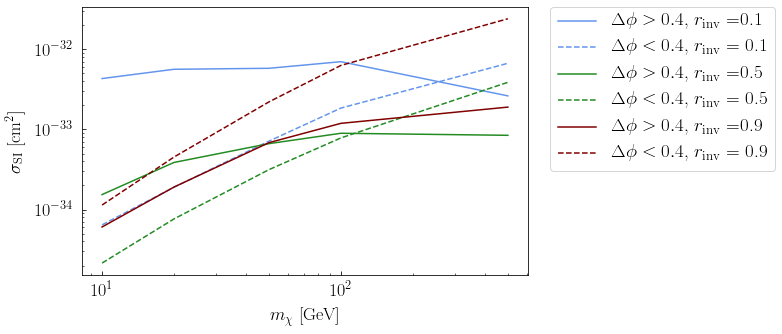

In [64]:
cols = ["cornflowerblue", "forestgreen", "maroon", "goldenrod"]
coli = 0
for i in range(len(rinv)):
    if i in [1,5,9]:
        plt.plot(m_arr, [sigma_si(g,m)*(GeV**-2)/(Centimeter**2) for g, m in zip(np.transpose(gr_arr)[i],m_arr)], label=r'$\Delta \phi > 0.4$, $r_\mathrm{inv}=$' +str(rinv[i]), color = cols[coli])
        plt.plot(m_arr, [sigma_si(l,m)*(GeV**-2)/(Centimeter**2) for l, m in zip(np.transpose(le_arr)[i],m_arr)], label=r'$\Delta \phi < 0.4$, $r_\mathrm{inv}=$ ' +str(rinv[i]), ls='--', color = cols[coli])
        coli+=1
plt.yscale("log")
plt.xscale("log")
plt.ylabel("$\sigma_\mathrm{SI}$ [cm$^2$]")
plt.xlabel("$m_\chi$ [GeV]")
lgd=plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.tight_layout() 
plt.savefig("DirectDetection.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [16]:
np.transpose(gr_arr)

array([[  466.11129644,   517.88128724,   761.88409543,   921.44351406,
         1639.13157106],
       [  783.90177645,   999.43534493,  1423.89764213,  1688.27171398,
         2874.70639283],
       [ 1217.17817059,  1429.18001164,  1730.25185868,  2177.55896411,
         3357.23502043],
       [ 1368.93988974,  1621.05446442,  2078.57903569,  2414.12652652,
         3581.84019318],
       [ 1565.37966432,  1787.72965999,  2234.58460479,  2612.50539749,
         3765.57424401],
       [ 1804.7451217 ,  1952.39440498,  2446.94576892,  2823.61954773,
         3816.55303747],
       [ 1922.88197754,  2197.18291115,  2514.25901636,  2889.04542161,
         3835.92854956],
       [ 2106.2598362 ,  2289.52643882,  2621.65730506,  2920.75768656,
         3770.43548814],
       [ 2249.52509989,  2407.45937277,  2626.31957244,  2838.77250188,
         3568.22118194],
       [ 2277.9063886 ,  2330.37553013,  2429.51149429,  2629.11485335,
         3116.51976437],
       [ 2023.29089919,  2040.

In [10]:
import sys
sys.path.append("/group/hepheno/smsharma/Fermi-LSS/2MASS/")
from units import *

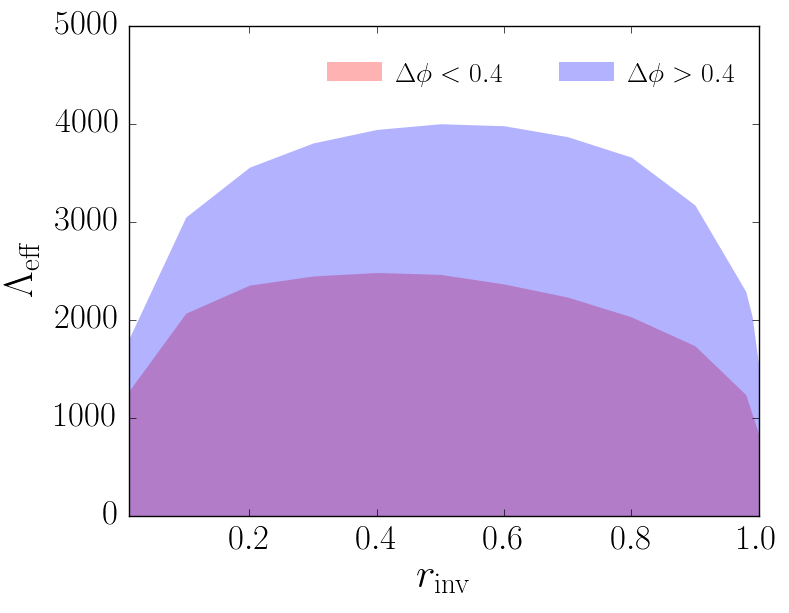

In [8]:
newfig("cutoff")
#plt.plot(rinv, np.sqrt(exc/(5./2.)**4), lw=3, alpha=0.3)



# plot excluded cxn
cxn=np.asarray([ d.meta['cxn'][0] for d in sig10 ])

cutoff=10000

plt.fill_between(rinv, 0, cutoff/(exc_small**(1/4)), lw=0, 
                 color='red', facecolor='red',alpha=0.3, label=r'$\Delta \phi < 0.4$')
plt.fill_between(rinv, 0, cutoff/(exc_large**(1/4)), lw=0,
                 color='blue', facecolor='blue',alpha=0.3, label=r'$\Delta \phi > 0.4$')





#plt.yscale('log', nonposy='clip')
plt.xlabel(r'$r_{\rm inv}$',fontsize=30)
plt.ylabel(r'$\Lambda_{\rm eff}$',fontsize=30)
plt.xlim([0.01,1.0])
plt.ylim([0, 5000])
plt.savefig("cxn.pdf")

plt.legend(bbox_to_anchor=(0, 0, 0.98, 0.95),
           fontsize=20, ncol=2,frameon=False,
           handletextpad=.5,
           borderaxespad=0.)


plt.show()


In [45]:
# Set plotting options

import matplotlib as mpl

mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'CMU Serif'
mpl.rcParams['figure.figsize'] = (8,8/1.61803398875)
mpl.rcParams['legend.fontsize'] = 19
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['text.usetex'] = True

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

# mpl.rcParams['xtick.top'] = True
# mpl.rcParams['ytick.right'] = True

mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2

mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 2

mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['ytick.major.pad'] = 8

mpl.rcParams['axes.labelpad'] = 9

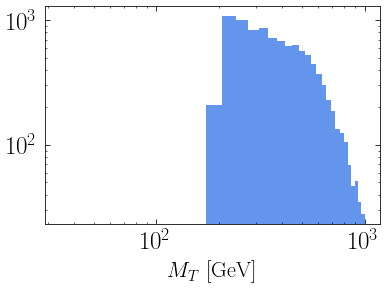

In [14]:
import pandas as pd
plt.hist(pd.read_csv("../gen/output.evt")['MEt'], bins=np.linspace(0,1000,30))
plt.xlabel("$M_T$ [GeV]")
plt.yscale("log")
plt.xscale("log")